In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Exploratory Data Analysis

Load dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/interview/XternData.csv')
df

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


Structure and Summary Statistics

From the data frame, we can see that there are 5000 records and 5 fields.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


There is 1 field that is numeric (int64). The summary statistics of numeric fields are shown below.

In [4]:
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


There are also 4 fields that are type of object (string). Let's take a closer look at these fields.

In [6]:
#look at unique values in one of these fields
pd.unique(df[['Year']].values.ravel())

array(['Year 2', 'Year 3', 'Year 1', 'Year 4'], dtype=object)

In [7]:
pd.unique(df[['Major']].values.ravel())

array(['Physics', 'Chemistry', 'Biology', 'Business Administration',
       'Anthropology', 'Mathematics', 'Economics', 'Astronomy',
       'Marketing', 'Political Science', 'Finance', 'Sociology',
       'Accounting', 'Psychology', 'International Business', 'Music',
       'Mechanical Engineering', 'Philosophy', 'Fine Arts',
       'Civil Engineering'], dtype=object)

In [8]:
pd.unique(df[['University']].values.ravel())

array(['Indiana State University', 'Ball State University',
       'Butler University',
       'Indiana University-Purdue University Indianapolis (IUPUI)',
       'University of Notre Dame', 'University of Evansville',
       'Valparaiso University', 'Purdue University',
       'Indiana University Bloomington', 'DePauw University'],
      dtype=object)

In [9]:
pd.unique(df[['Order']].values.ravel())

array(['Fried Catfish Basket', 'Sugar Cream Pie', 'Indiana Pork Chili',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Indiana Buffalo Chicken Tacos (3 tacos)', 'Sweet Potato Fries',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Breaded Pork Tenderloin Sandwich', 'Cornbread Hush Puppies',
       'Hoosier BBQ Pulled Pork Sandwich'], dtype=object)

All of the columns are complete that there is no missing values, which is great.

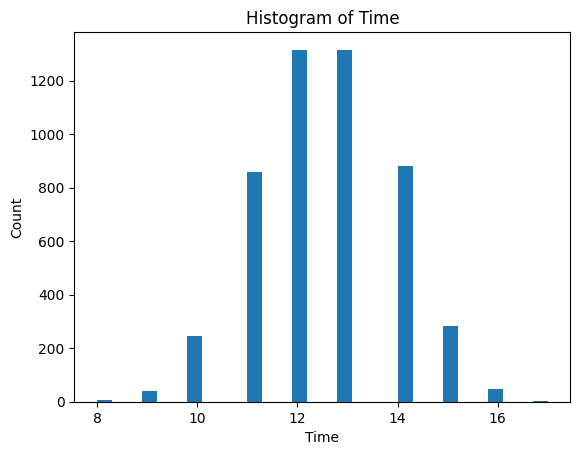

In [33]:
#plot histogram
import matplotlib.pyplot as plt

plt.hist(df['Time'], bins=30)

plt.title('Histogram of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

We can see an approximate normal distribution. Most of the orders have time around 12.

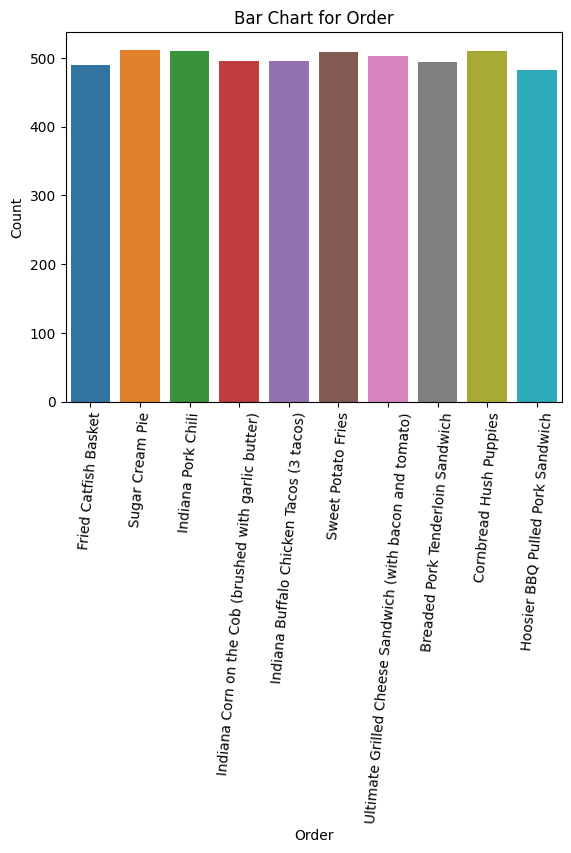

In [45]:
sns.countplot(data=df, x='Order')

plt.title("Bar Chart for Order")
plt.xticks(rotation=85)
plt.ylabel("Count")
plt.show()

We can see an approximate uniform distribution, indicating that the target variable is balanced.

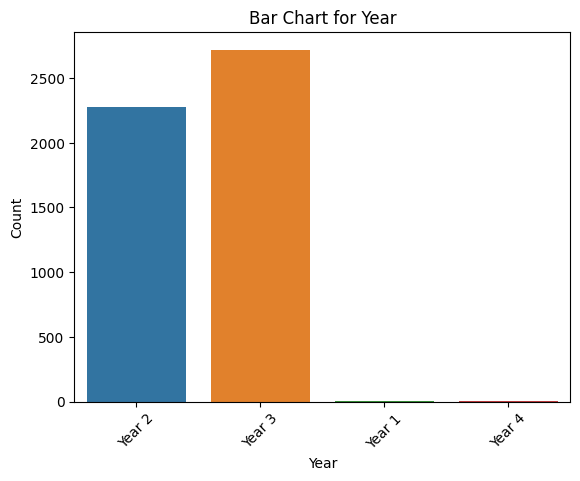

In [47]:
sns.countplot(data=df, x='Year')

plt.title("Bar Chart for Year")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Most of the students are in Year 2 or Year 3.

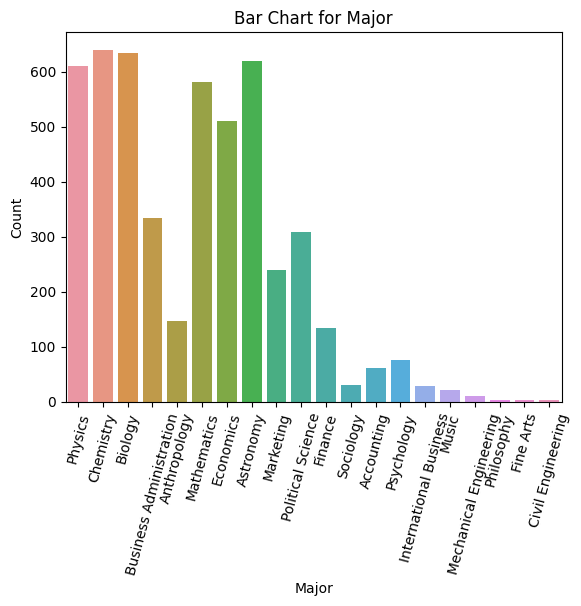

In [50]:
sns.countplot(data=df, x='Major')

plt.title("Bar Chart for Major")
plt.xticks(rotation=75)
plt.ylabel("Count")
plt.show()

Chemistry, Biology, and Astronomy are the 3 most frequent majors that have ordered.

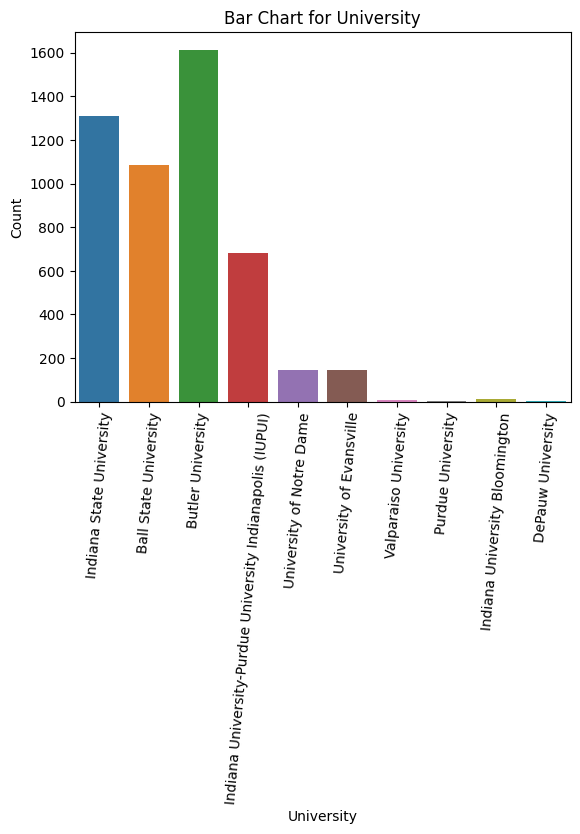

In [53]:
sns.countplot(data=df, x='University')

plt.title("Bar Chart for University")
plt.xticks(rotation=85)
plt.ylabel("Count")
plt.show()

Most of the students come from Butler University, Indiana State University, and Ball State University.

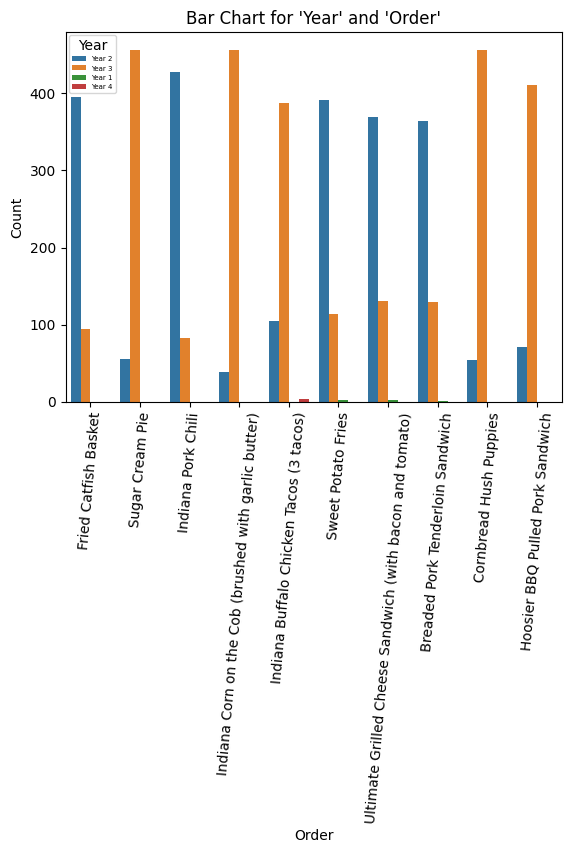

In [63]:
#relationship between Major and Order
sns.countplot(data=df, x='Order', hue='Year')

plt.title("Bar Chart for 'Year' and 'Order'")
plt.xticks(rotation=85)
plt.ylabel("Count")
plt.legend(title="Year", fontsize="5" )
plt.show()

We can see that different years prefer different kinds of food. For example, Year 3 students prefer Sugar Cream Pie over Year 2 students, and Year 2 prefer Indiana Pork Chili over Year 3 students.

Business Insight: We can consider create different promotions for different food according to students' year. This can potentially attract more customers more accordingly.

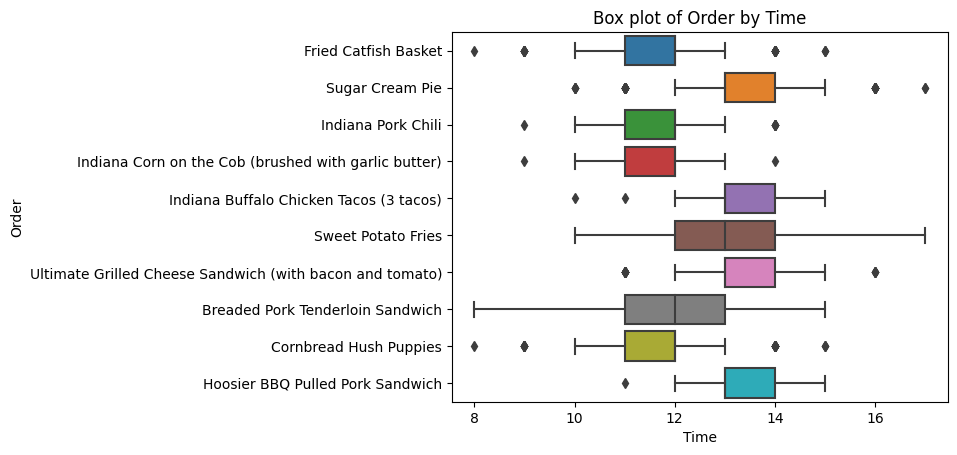

In [64]:
sns.boxplot(x="Time", y="Order", data=df)

plt.title('Box plot of Order by Time')
plt.xlabel('Time')
plt.ylabel('Order')
plt.show()

We can see that different orders have similar time, around 11 to 14.

In [66]:
pd.crosstab(df['Order'], df['Time']).apply(lambda x: round(x/x.sum() * 100, 2))

Time,8,9,10,11,12,13,14,15,16,17
Order,,,,,,,,,,
Breaded Pork Tenderloin Sandwich,75.0,42.5,27.94,14.12,11.34,6.91,3.51,3.55,0.00,0.0
Cornbread Hush Puppies,12.5,25.0,21.86,17.85,13.70,6.91,2.04,1.06,0.00,0.0
Fried Catfish Basket,12.5,27.5,19.43,16.22,15.68,4.71,2.27,1.06,0.00,0.0
Hoosier BBQ Pulled Pork Sandwich,0.0,0.0,0.00,0.12,1.07,19.76,22.76,2.13,0.00,0.0
Indiana Buffalo Chicken Tacos (3 tacos),0.0,0.0,0.40,0.12,5.02,15.50,20.61,14.89,0.00,0.0
Indiana Corn on the Cob (brushed with garlic butter),0.0,2.5,5.67,21.94,18.95,3.19,0.11,0.00,0.00,0.0
Indiana Pork Chili,0.0,2.5,20.24,19.60,15.45,6.16,0.79,0.00,0.00,0.0
Sugar Cream Pie,0.0,0.0,2.02,3.85,6.70,11.40,15.40,28.37,36.73,50.0
Sweet Potato Fries,0.0,0.0,2.43,4.43,6.62,11.55,14.16,25.53,53.06,50.0


We can also use a cross table to look at the percentage of order for each time.

In [67]:
pd.crosstab(df['Order'], df['Major']).apply(lambda x: round(x/x.sum() * 100, 2))

Major,Accounting,Anthropology,Astronomy,Biology,Business Administration,Chemistry,Civil Engineering,Economics,Finance,Fine Arts,International Business,Marketing,Mathematics,Mechanical Engineering,Music,Philosophy,Physics,Political Science,Psychology,Sociology
Order,,,,,,,,,,,,,,,,,,,,
Breaded Pork Tenderloin Sandwich,22.58,0.00,13.57,3.31,18.26,7.03,0.00,3.52,17.78,0.00,31.03,28.03,14.60,36.36,0.00,0.0,9.34,1.62,0.00,0.00
Cornbread Hush Puppies,22.58,2.05,11.95,6.30,19.76,7.50,0.00,2.15,24.44,0.00,17.24,24.69,12.71,18.18,0.00,0.0,12.46,0.97,1.32,3.23
Fried Catfish Basket,1.61,24.66,5.33,12.60,1.50,10.16,0.00,13.89,0.00,66.67,0.00,1.67,4.12,0.00,52.38,50.0,9.18,19.42,34.21,45.16
Hoosier BBQ Pulled Pork Sandwich,0.00,25.34,5.01,15.91,1.50,13.59,0.00,17.42,0.00,0.00,0.00,1.26,2.41,0.00,9.52,0.0,8.36,15.53,17.11,3.23
Indiana Buffalo Chicken Tacos (3 tacos),25.81,2.05,14.70,4.41,16.47,7.50,33.33,1.57,32.59,0.00,24.14,12.97,16.15,36.36,4.76,0.0,10.00,1.29,0.00,0.00
Indiana Corn on the Cob (brushed with garlic butter),27.42,0.68,15.19,4.25,16.77,7.81,66.67,3.91,22.96,0.00,27.59,20.50,12.54,9.09,0.00,0.0,10.00,1.29,0.00,3.23
Indiana Pork Chili,0.00,5.48,1.94,25.20,0.30,16.72,0.00,25.64,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.0,6.39,15.86,2.63,0.00
Sugar Cream Pie,0.00,17.12,6.79,14.02,0.90,11.88,0.00,17.22,0.00,33.33,0.00,0.84,3.26,0.00,23.81,0.0,10.82,23.95,22.37,16.13
Sweet Potato Fries,0.00,22.60,4.85,13.70,1.50,14.84,0.00,14.29,0.00,0.00,0.00,0.42,4.47,0.00,9.52,50.0,10.82,20.06,22.37,29.03


Similar criss table can also be shown for major and order. From the above cross table, we can understand more about preferences of orders for students from different majors.

Business insight: Delving deeper into this cross table can also help us come up with more targeted promotions. For example, Fried Catfish Basket for Music major students, as they are the major customers for this kind of food (53%).

##Feature Engineering

Since most of the columns are categorical, if we want to build a machine learning model, we need to transfer them. Here I used One-hot Encoding.

In [70]:
object_cols = list(df[['Year', 'Major', 'University']])

#create new df that contains all the features after feature engineering
df1 = pd.get_dummies(df, columns=object_cols)

df1

,Time,Order,Year_Year 1,Year_Year 2,Year_Year 3,Year_Year 4,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,12,Fried Catfish Basket,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,14,Sugar Cream Pie,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,12,Indiana Pork Chili,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,11,Fried Catfish Basket,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,12,Indiana Corn on the Cob (brushed with garlic b...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,Breaded Pork Tenderloin Sandwich,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4996,12,Ultimate Grilled Cheese Sandwich (with bacon a...,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4997,13,Sugar Cream Pie,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4998,15,Sugar Cream Pie,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Implications of Data Collection, Storage, and Biases

### Ethical Implications:

1. **Privacy Concerns:**
   - **Data Collection**: This dataset contains information about students including their majors, university,and year. The positive side is that it does not include any identification information of students, such as name and student ID. However, using all of the information combined, they may also be recognized. Therefore, it is crucial to ensure informed consent and transparent communication about how the data will be used.
   
2. **Bias and Fairness:**
   - **Data Bias**: If data has unintentional biases, predictions might favor certain user groups, perpetuating existing biases. In this case, we need to consider whether some student groups have higher accuracy against others. If so this may be unfair to these groups as they may not have the same chance of getting promotions are other groups.
   - In this case, we know from the dataset that there are more Year 2 and Year 3 students, and there are more students from Butler University, Indiana State University, and Ball State University. We need to pay close attention to the accuracy of our model by the subgroups.


### Business Outcome Implications:

1. **Customer Trust:**
   - **Privacy Violation**: Mishandling or misuse of data can erode customer trust, increasing the churn rate.
   - **User Experience**: Ensuring that data utilization (like order predictions) enhances user experience without becoming invasive is crucial.

2. **Financial Impacts:**
   - **Promotion Costs**: Constantly inaccurate order predictions leading to frequent discounts could become financially unsustainable. On the other hand, if we do not give much promotion to certain groups, they may not get much benefits. We need to ensure our model is accurate while fair.

3. **Relevance and Adaptation:**
   - **Data Relevance**: Data should stay relevant and up-to-date to cater to changing customer preferences, ensuring predictions remain accurate and applicable.

### Technical Implications:

1. **Data Security:**
   - **Storage**: We need to keep the data safe. Otherwise, their personal information may be gained through implications.
   
2. **Scalability and Maintenance:**
   - **Model Scalability**: The technological setup must handle increasing data and user load as the business grows.
   - **Model Maintenance**: Continuous monitoring and maintenance of the model are vital. As we deploy our model for predictions, we need continuous learning that new order data should be feed in. If there's any decrease on the performance of our model, we need to retrain it using the new data we got.

3. **Model Robustness:**
   - **Model Complexity vs. Explainability**: We need to find a balance between accuracy and interpretability/explainability for our model. Therefore, we will not use neural networks. Simpler models are always better for understanding the underlying procedures.

## Model Training

To build a predictive model, we should first think of the appropriate models we can use and choose proper evaluation metrics.

For this dataset, the target variable Order has 10 different categorical labels, so we are building a classification model. The most basic classification model is logistic regression, which is simple and easy to interpret. I will start with this one. I will also build a random forest model, as it is an ensemble method that several decision trees are combinedly used. If I have more time, I can try other models such as XGBoost which resembles random forest but build individual models sequentially.

Moreover, we can see from previous analysis that the dataset is well balanced. Also, we care about whether our prediction of order is correct, we want to know the percentage of correct classifications. Therefore, accuracy is a good choice in this problem.

In [71]:
#split train and test set
from sklearn.model_selection import train_test_split

#creating the X and y variables
X = df1.drop('Order', 1)
y = df1['Order']

#spliting X and y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

<ipython-input-71-40e7201cef22>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop('Order', 1)


In [82]:
#standardization
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [128]:
#Function that combines everything above
def data_processing(file_path):
    df = pd.read_csv(file_path)

    object_cols = ['Year', 'Major', 'University']
    df1 = pd.get_dummies(df, columns=object_cols)

    X = df1.drop('Order', axis=1)
    y = df1['Order']

    # Split before scaling to keep original values for subgroup analysis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Also, saving non-encoded but split test data for future reference
    X_test_original = df.loc[X_test.index, :]

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    return X_train, X_test, y_train, y_test, X_test_original

In [129]:
X_train, X_test, y_train, y_test, X_test_original = data_processing('/content/drive/MyDrive/interview/XternData.csv')

In [85]:
#logistic regression
from sklearn.linear_model import LogisticRegression

def train_logistic_reg(X_train, y_train):

    lr = LogisticRegression(max_iter=1000, multi_class='ovr')
    lr.fit(X_train, y_train)

    return lr

In [75]:
#random forest
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train):

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return model

In [76]:
#save model
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [92]:
#function for test model
from sklearn.metrics import accuracy_score, classification_report

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(report)

Since we want to make sure the model performace is consistent with different subgroups of students, I created another function to print the accuracy for each subgroups from the University column.

In [145]:
def test_subgroups(model, X_test, y_test, X_test_original):

    predictions = model.predict(X_test)

    # Adding predictions to the test data
    test_data_with_pred = X_test_original.copy()
    test_data_with_pred['True Order'] = y_test
    test_data_with_pred['Predicted Order'] = predictions

    # Calculating accuracy for each university
    universities = test_data_with_pred['University'].unique()

    accuracies = []
    for uni in universities:
        subset = test_data_with_pred[test_data_with_pred['University'] == uni]
        accuracy = accuracy_score(subset['True Order'], subset['Predicted Order'])
        accuracies.append((uni, accuracy))
        print(f"Accuracy for {uni}: {accuracy * 100:.2f}%")

    # Convert accuracy to DataFrame for visualization
    accuracy_df = pd.DataFrame(accuracies, columns=['University', 'Accuracy'])

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=accuracy_df, x='University', y='Accuracy', palette='viridis')
    plt.xticks(rotation=75)
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy per University')
    plt.show()

In [127]:
#train and test for logistic regression
lr = train_logistic_reg(X_train, y_train)
save_model(lr, 'lr.pkl')
test_model(lr, X_test, y_test)

Accuracy: 0.591
Classification Report:
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.57      0.43      0.49        94
                                  Cornbread Hush Puppies       0.58      0.55      0.57       112
                                    Fried Catfish Basket       0.67      0.53      0.59       107
                        Hoosier BBQ Pulled Pork Sandwich       0.54      0.53      0.54       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.57      0.56      0.57        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.51      0.82      0.63        84
                                      Indiana Pork Chili       0.63      0.82      0.71        95
                                         Sugar Cream Pie       0.62      0.66      0.64       110
                                      Sweet Potato Fries       0.59      0.48 

Accuracy for Ball State University: 68.18%
Accuracy for Butler University: 51.26%
Accuracy for Indiana State University: 56.42%
Accuracy for University of Evansville: 63.33%
Accuracy for Indiana University-Purdue University Indianapolis (IUPUI): 62.73%
Accuracy for University of Notre Dame: 76.67%
Accuracy for Indiana University Bloomington: 100.00%
Accuracy for Purdue University: 0.00%
Accuracy for Valparaiso University: 100.00%


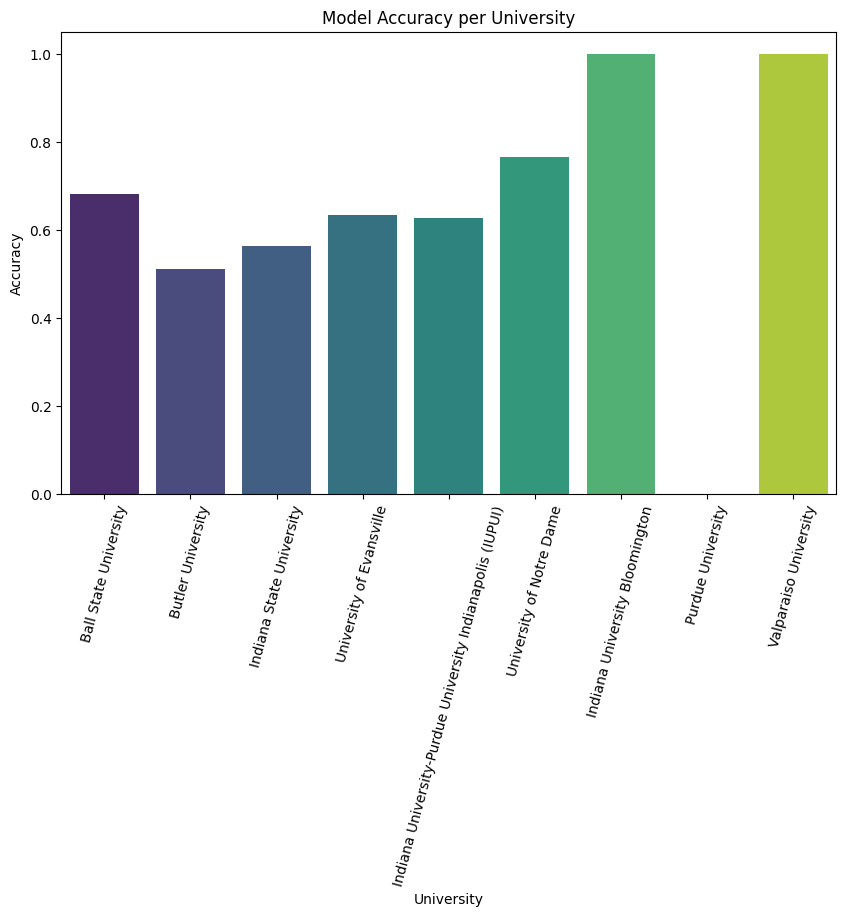

In [146]:
#look at subgroup performances
test_subgroups(lr, X_test, y_test, X_test_original)

In [87]:
#train and test for random forest
rf = train_random_forest(X_train, y_train)
save_model(rf, 'rf.pkl')
test_model(rf, X_test, y_test)

Accuracy: 0.654
Classification Report:
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.63      0.49      0.55        94
                                  Cornbread Hush Puppies       0.57      0.62      0.60       112
                                    Fried Catfish Basket       0.73      0.59      0.65       107
                        Hoosier BBQ Pulled Pork Sandwich       0.68      0.65      0.66       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.60      0.60      0.60        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.68      0.85      0.76        84
                                      Indiana Pork Chili       0.76      0.85      0.80        95
                                         Sugar Cream Pie       0.63      0.61      0.62       110
                                      Sweet Potato Fries       0.61      0.59 

Accuracy for Ball State University: 73.23%
Accuracy for Butler University: 58.81%
Accuracy for Indiana State University: 63.81%
Accuracy for University of Evansville: 76.67%
Accuracy for Indiana University-Purdue University Indianapolis (IUPUI): 66.46%
Accuracy for University of Notre Dame: 80.00%
Accuracy for Indiana University Bloomington: 66.67%
Accuracy for Purdue University: 0.00%
Accuracy for Valparaiso University: 100.00%


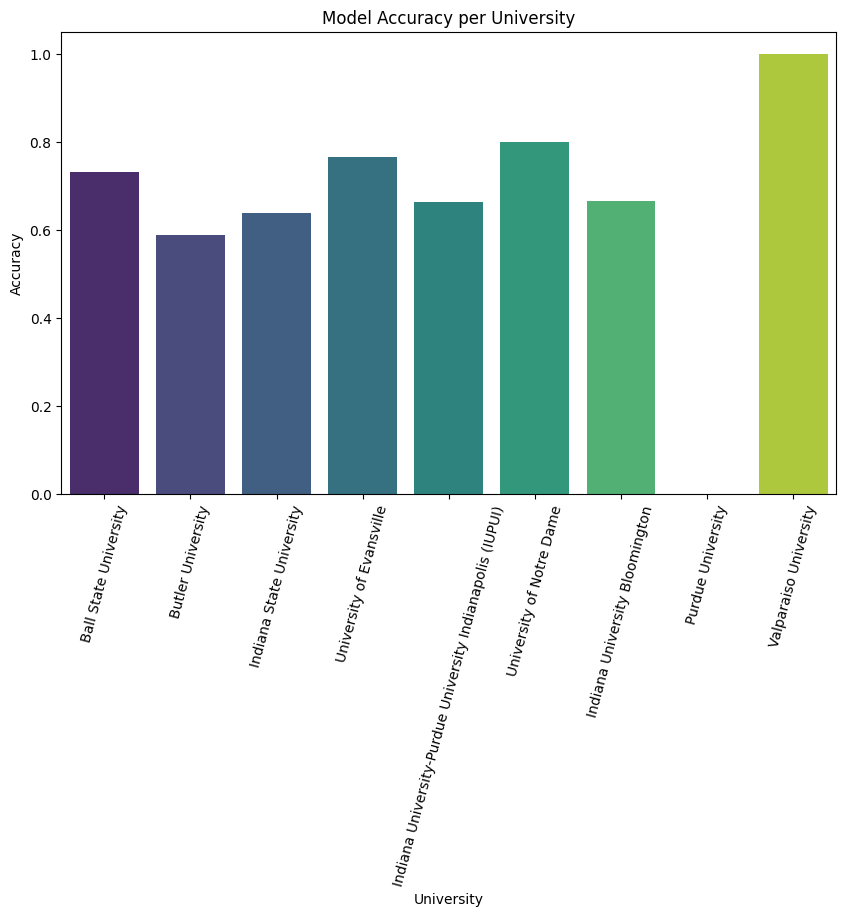

In [147]:
#look at subgroup performances
test_subgroups(rf, X_test, y_test, X_test_original)

The model performance for random forest is better than logistic regression, in terms of accuracy. It reaches around 66% of accuracy. This means 66% times of the order prediction is correct.

I also dived deeper for students from different universities to find out any potential unfairness. Overall the performance is consistent. Since our dataset is small, Purdue University and DePauw University have too little data to learn from, so the result is low. Other universities have similar performance with around 70% of accuracy.

## Hyperparameter Tuning

I want to further improve the accuracy for my random forest model, so I'll use hyperparameter tuning. Random search is used here to save time, but grid search is more accurate.

In [114]:
#random search
from sklearn.model_selection import RandomizedSearchCV

def tuning_random_forest(X_train, y_train):

    #defining 4 hyperparameters that I want to search for
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15]
    }

    model = RandomForestClassifier(random_state=42)

    #set number of iteration to 15, so 15 trials will be done
    random_search = RandomizedSearchCV(model, param_dist, n_iter=30, scoring='accuracy', cv=3, n_jobs=-1)

    random_search.fit(X_train, y_train)

    #get the best parameters and best ROC AUC score
    best_params = random_search.best_params_
    best_acc = random_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_acc)

In [115]:
tuning_random_forest(X_train, y_train)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'max_depth': None}
Best Accuracy: 0.6575028314799839


## Considerations

Implementing an AI-driven ordering prediction system like this, especially in a real-world application like a food truck, involves careful considerations around technological, ethical, and business domains.

1. **Model Performance:**
   - **Accuracy:** As I mentioned before, the accuracy is around 66%. This means we need to calculate if we give 34% of the order a 10% promotions, how much we will lose. Does the new customers account for the promotions in the long run?

2. **User Experience:**
   - **Satisfaction:** We also need to consider how our customers will react to a model like this. Do they like the amount of promotions (34% of them will get promotions)?

3. **Technological Implications:**
   - **Integration:** When we actually implement this prediction system to the FoodX app, we need to make sure it is compatible and the UI is user friendly.
   - **Maintenance:** Continuous tuning and maintenance of the model is needed as more and more customers get involved.

4. **Ethical and Privacy Considerations:**
   - **Data Privacy:** We need to make sure the information they provided are securely saved and used.
   - **Bias and Fairness:** From the analysis above, we know that the model doesn't favor/disfavor certain universities. But we still need to look for other potential bias against other groups, like their majors.
   - **Transparency:** Making it clear to the users how their data will be utilized.

5. **Feedback and Iteration:**
   - **User Feedback:** Incorporate user feedback to refine and enhance the predictive ordering system.